# Исследование продаж недвижимости 

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
balcony — число балконов  
ceiling_height — высота потолков (м)  
cityCenters_nearest — расстояние до центра города (м)  
days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
first_day_exposition — дата публикации  
floor — этаж   
floors_total — всего этажей в доме   
is_apartment — апартаменты (булев тип)  
kitchen_area — площадь кухни в квадратных метрах (м²)   
last_price — цена на момент снятия с публикации     
living_area — жилая площадь в квадратных метрах (м²)  
locality_name — название населённого пункта  
open_plan — свободная планировка (булев тип)  
parks_around3000 — число парков в радиусе 3 км  
parks_nearest — расстояние до ближайшего парка (м)  
ponds_around3000 — число водоёмов в радиусе 3 км  
ponds_nearest — расстояние до ближайшего водоёма (м)  
rooms — число комнат  
studio — квартира-студия (булев тип)  
total_area — общая площадь квартиры в квадратных метрах (м²)  
total_images — число фотографий квартиры в объявлении  

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

data = pd.read_csv('real_estate_data.csv', delimiter='\t')

In [ ]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [ ]:
data.shape

(23699, 22)

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Видно, что в данных есть множество пустых значений.  
Рассмотрим столбцы 

**Вывод:** Видим, что только в первых 5 колонках из 22 отсутствуют пустые значения, а подавляющее большинство признаков необоснованно приведено к типу float.

### Предобработка данных

In [ ]:
data['last_price'] = data['last_price'].astype('int')

Стоимость переводим к int

#### Общая площадь

In [ ]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Минимальная площадь квартиры в датасете составляет 12 кв. метров, а максимальная - 900.  
Взглянем на квартиры с большими площадями, чтобы попытаться распознать аномалии.

In [ ]:
data[data['total_area'] > 150].sort_values(by='total_area', ascending=False).head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000,900.0,2017-12-06T00:00:00,12,2.8,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
12859,20,140000000,631.2,2019-04-09T00:00:00,7,3.9,4.0,322.3,4,NaN,...,19.5,1.0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
3117,19,140000000,631.0,2019-03-30T00:00:00,7,NaN,5.0,NaN,5,NaN,...,60.0,NaN,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
15651,20,300000000,618.0,2017-12-18T00:00:00,7,3.4,7.0,258.0,5,NaN,...,70.0,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
5358,20,65000000,590.0,2019-02-14T00:00:00,15,3.5,6.0,409.0,3,NaN,...,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0


Видим, что квартиры с огромной площадью отнюдь не являются аномалией.

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
data['first_day_exposition'].sample(1)

13355   2017-10-30
Name: first_day_exposition, dtype: datetime64[ns]

#### Всего этажей в доме

Существует множество разных стандартов застройки, от которых зависит количество этажей в домах.  
Так, например, в сталинках количество этажей составляет от 3 до 5, в брежневках от 9 до 12 и т.д.  

Попробуем заполнить пропуски в колонке, отталкиваясь от этих показателей и учитывая этаж рассматриваемой квартиры.

In [ ]:
#data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median()).astype('int')
default_floors_total = [3, 5, 9, 12, 18, 24]

for floor in default_floors_total:
    data.loc[(data['floors_total'].isna()) & (data['floor'] <= floor), 'floors_total'] = floor
data['floors_total'] = data['floors_total'].astype('int')

Заполняем пустоты и приводим к int

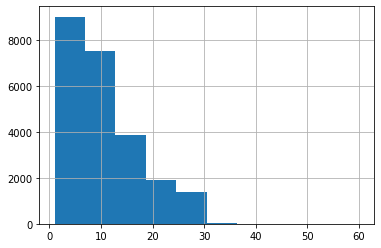

In [ ]:
data['floors_total'].hist()

Аномальных значений нет

#### Жилая площадь

Посчитаем средний процент жилой площади от общей и заполним пропуски в соответствии с этим соотношением.  
Причиной возникновения пустот могло послужить простое отсутствие сведений и замеров конкретно жилой площади.

In [ ]:
data['living_area'] = data['living_area'].fillna(data['total_area']*
                                        (data['living_area'].median()/data['total_area'].median()))

#### Количество этажей

Text(0.5, 1.0, 'Количество квартир на каждом этаже')

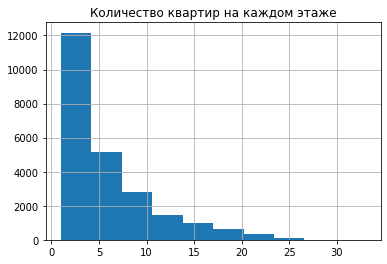

In [ ]:
data['floor'] = data['floor'].astype('int')
data['floor'].hist().set_title("Количество квартир на каждом этаже")

Аномальных значений не обнаружено.

#### Дни с публикации до снятия
Количество дней целесообразнее хранить целочисленным значением.  
Пропуски, вероятно, возникли в объявлениях, провисевших менее 1 дня.

In [ ]:
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')

#### Названия населённых пунктов
Первым делом стоит привести все значения к единому регистру, чтобы убрать дубликаты, вызванные использованием неправильного регистра при написании, если таковые присутствуют.

In [ ]:
data['locality_name'] = data['locality_name'].str.lower()


Неявных дубликатов не обнаружено.

### Генерация признаков
Создадим новый столбец с ценой за квадратный метр

In [ ]:
data['price_per_square_meter'] = data['last_price'] / data['total_area']
data['price_per_square_meter'] = data['price_per_square_meter'].astype('int')
data['price_per_square_meter'].sample(1)

7672    78674
Name: price_per_square_meter, dtype: int64

Соотнесём объявления по категориям этажа: 'первый', 'последний' и 'другой'

In [ ]:
def categorize_floor(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
      
data['floor_type'] = data.apply(categorize_floor, axis = 1)
data['floor_type'].sample(1)

21903    другой
Name: floor_type, dtype: object

Добавим столбец с расстоянием до ближайшего городского центра в километрах

In [ ]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(0).astype('int')
data['cityCenters_nearest_km'].sample(1)

18392    0
Name: cityCenters_nearest_km, dtype: int64

### Исследовательский анализ данных


#### Общая площадь

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

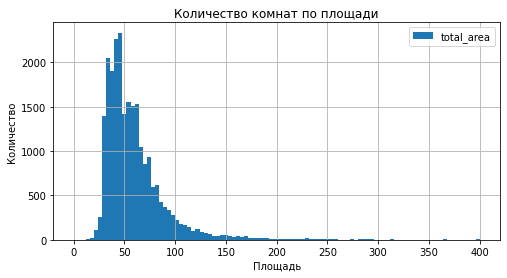

In [ ]:
data.plot(y='total_area', kind='hist', bins=100, grid=True, figsize=(8,4), range=(0,400))
plt.title('Количество квартир по площади')
plt.ylabel('Количество')
plt.xlabel('Площадь')
data['total_area'].describe()

**Вывод:** Имеются небольшие выбросы, однако они не оказывают негативного влияния. Общая картина видна по описанию.

#### Цена объекта

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

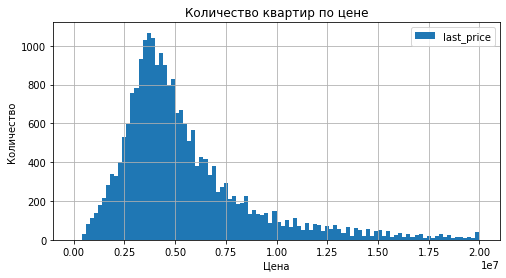

In [ ]:
data.plot(y='last_price', kind='hist', bins=100, grid=True, figsize=(8,4), range=(0,20000000))
plt.title('Количество квартир по цене')
plt.ylabel('Количество')
plt.xlabel('Цена')
data['last_price'].describe()

**Вывод:** С данными всё в порядке, даже не обнаружено сильных аномалий и выбросов.

#### Этаж квартиры

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

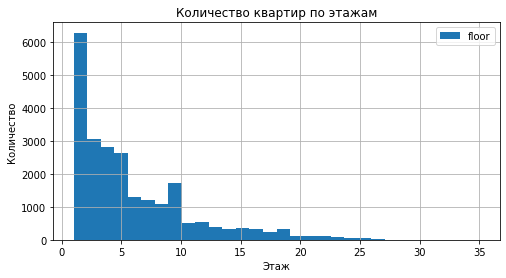

In [ ]:
data.plot(y='floor', kind='hist', bins=30, grid=True, figsize=(8,4), range=(1,35))
plt.title('Количество квартир по этажам')
plt.ylabel('Количество')
plt.xlabel('Этаж')
data['floor'].describe()

**Вывод:** С этажами тоже всё в порядке. Аномалий и критичных выбросов не обнаружено.

#### Тип этажа квартиры

In [ ]:
data['floor_type'].value_counts()

другой       17422
последний     3360
первый        2917
Name: floor_type, dtype: int64

#### Расстояние до центра города в метрах

count    23699.000000
mean     10886.426896
std       9634.613697
min          0.000000
25%       2242.000000
50%      11247.000000
75%      15248.500000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

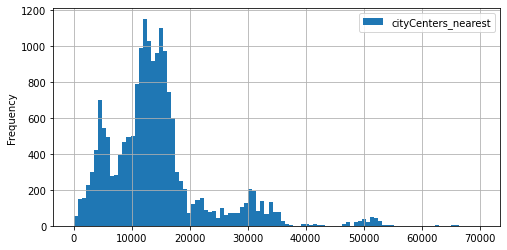

In [ ]:
data.plot(y='cityCenters_nearest', kind='hist', bins=100, grid=True, figsize=(8,4), range=(1,70000))
plt.title('Количество квартир до центра')
plt.ylabel('Количество')
plt.xlabel('Расстояние до центра')
data['cityCenters_nearest'].describe()

#### Факторы, влияющие на общую стоимость объекта

##### Зависимость цены от общей площади

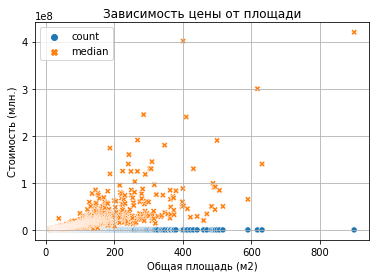

0.6536750579657244

In [ ]:
total_area_dependent = data.pivot_table(index='total_area', values='last_price', \
                                        aggfunc=['count', 'median'])

total_area_dependent.columns = ['count', 'median']
#total_area_dependent.plot(y='median', style='o', alpha=0.3)

plt.title('Зависимость цены от площади')
plt.ylabel('Стоимость (млн.)')
plt.xlabel('Общая площадь (м2)')
plt.grid(True)
sns.scatterplot(data=total_area_dependent)
plt.show()

total_area_dependent.sort_values('median', ascending=False)
data['total_area'].corr(data['last_price'])

**Вывод:** Корреляция оказалась чуть выше среднего, что говорит о наличии хорошей зависимости цены недвижимости от её общей площади. Чем выше площадь, тем больше становится цена.

##### Зависимость цены от типа этажа

In [ ]:
floor_type_dependent = data.query('floor_type != "другой"') \
                           .pivot_table(index='floor_type', values='last_price', \
                                        aggfunc=['count', 'median'])

floor_type_dependent.columns = ['count', 'median']
floor_type_dependent

,count,median
floor_type,,
первый,2917,3900000
последний,3360,4300000


**Вывод:** Известный факт, что жильё на первых этажах ценится меньше. Чем выше этаж, тем больше стоимость жилья.

### Проверка гипотезы
Выдвигаем нулевую гипотезу.  
H0: Чем дальше квартира от центра города, тем меньше её стоимость за квадратный метр.

#### Cредняя цена квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [ ]:
top_locality = data.pivot_table(index='locality_name', \
                                values='price_per_square_meter', aggfunc=['count', 'mean'])
top_locality.columns = ['count', 'mean']
top_locality = top_locality.sort_values('count', ascending=False).head(10)
top_locality

,count,mean
locality_name,,
санкт-петербург,15721,114848.565231
посёлок мурино,522,85751.733716
посёлок шушары,440,78676.904545
всеволожск,398,68654.007538
пушкин,369,103125.373984
колпино,338,75424.150888
посёлок парголово,327,90175.489297
гатчина,307,68745.693811
деревня кудрово,299,92473.086957


**Вывод:** Самая высокая стоимость квадратного метра оказалась в Санкт-Петербурге, а самая низкая - в Выборге.

#### Цена каждого километра от центра Санкт-Петербурга

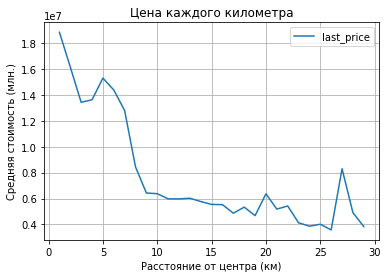

In [ ]:
spb_km_mean_price = data.query('locality_name == "санкт-петербург" and cityCenters_nearest_km != 0') \
                        .pivot_table(index='cityCenters_nearest_km', \
                                     values='last_price', aggfunc='mean')

plt.title('Цена каждого километра')
plt.ylabel('Средняя стоимость (млн.)')
plt.xlabel('Расстояние от центра (км)')
plt.grid(True)
sns.lineplot(data=spb_km_mean_price)
plt.show()

**Вывод:** Как и ожидалось, чем дальше жильё располагается от центра города, тем меньше становится стоимость его квадратного метра. Аномальные пики на графике, вероятно, вызваны нахождением в этих зонах дорогого элитного жилья.  

Гипотеза подтверждена.